# import libraries

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# import data

In [51]:
data=pd.read_csv('customers_segmentation.csv')

In [52]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# preprocess

In [53]:
data.drop('CustomerID', axis=1,inplace=True) 

In [54]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender']) 
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


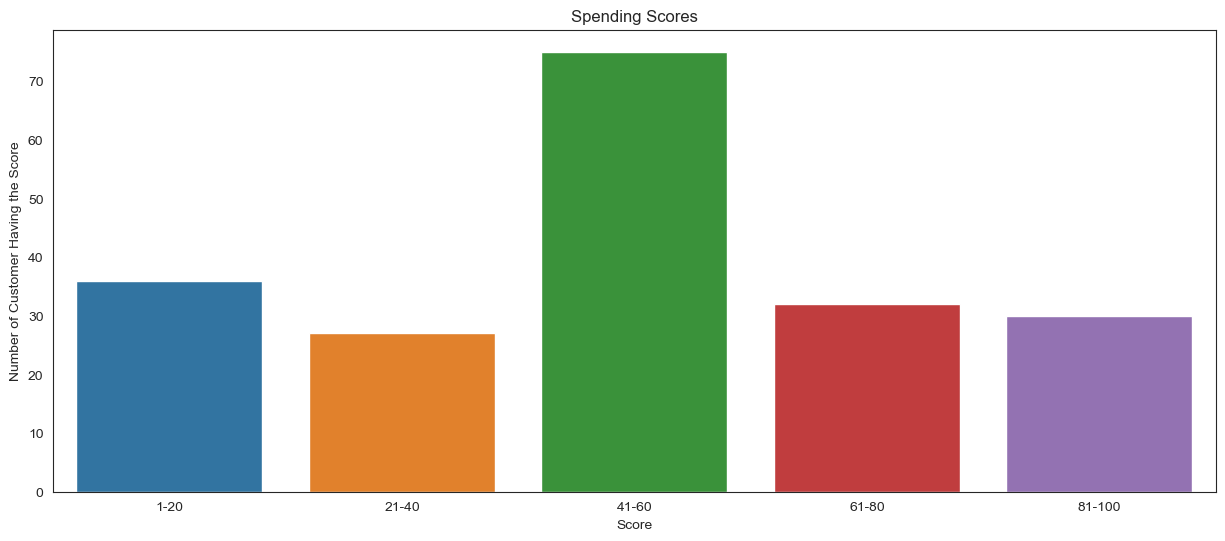

In [55]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6)) 
sns.barplot(x=ssx, y=ssy) 
plt.title("Spending Scores") 
plt.xlabel("Score") 
plt.ylabel("Number of Customer Having the Score") 
plt.show()


# data preprocessing

In [56]:
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [57]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# find n value

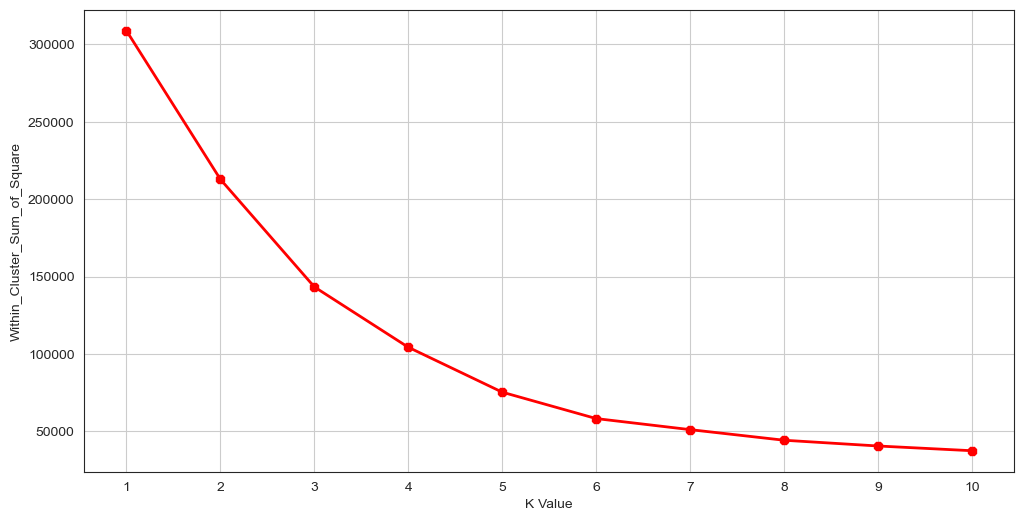

In [58]:
Within_Cluster_Sum_of_Square = []
for k in range(1,11):  
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data)
    Within_Cluster_Sum_of_Square.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),Within_Cluster_Sum_of_Square, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within_Cluster_Sum_of_Square")
plt.show()

# build model

In [70]:
km = KMeans(n_clusters=5, n_init=5)
clusters = km.fit_predict(data)
data["label"] = clusters

# visualization clusters

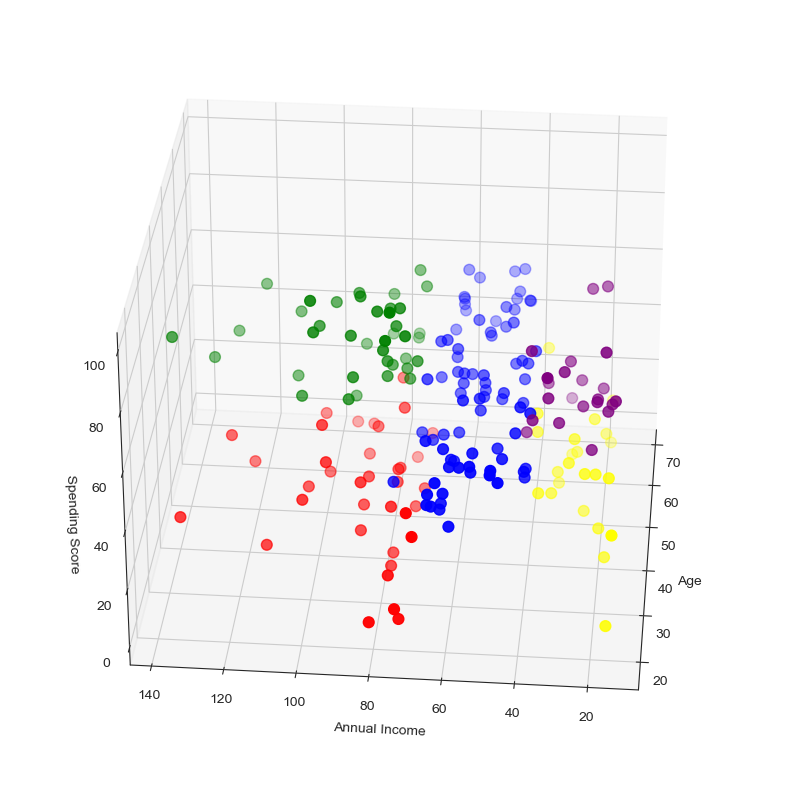

In [71]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data["Age"][data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data["Age"][data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data["Age"][data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='purple', s=60)
ax.scatter(data["Age"][data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score')
plt.show()

In [72]:
data[data.label == 0]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
43,0,31,39,61,0
46,0,50,40,55,0
47,0,27,40,47,0
48,0,29,40,42,0
49,0,31,40,42,0
...,...,...,...,...,...
120,1,27,67,56,0
121,0,38,67,40,0
122,0,40,69,58,0
126,1,43,71,35,0


In [73]:
data[data.label == 1]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
124,0,23,70,29,1
128,1,59,71,11,1
130,1,47,71,9,1
132,0,25,72,34,1
134,1,20,73,5,1
136,0,44,73,7,1
138,1,19,74,10,1
140,0,57,75,5,1
144,1,25,77,12,1
146,1,48,77,36,1


In [74]:
data[data.label == 2]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
123,1,39,69,91,2
125,0,31,70,77,2
127,1,40,71,95,2
129,1,38,71,75,2
131,1,39,71,75,2
133,0,31,72,71,2
135,0,29,73,88,2
137,1,32,73,73,2
139,0,35,74,72,2
141,1,32,75,93,2


In [75]:
data[data.label == 3]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
1,1,21,15,81,3
3,0,23,16,77,3
5,0,22,17,76,3
7,0,23,18,94,3
9,0,30,19,72,3
11,0,35,19,99,3
13,0,24,20,77,3
15,1,22,20,79,3
17,1,20,21,66,3
19,0,35,23,98,3


In [76]:
data[data.label == 4]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
2,0,20,16,6,4
4,0,31,17,40,4
6,0,35,18,6,4
8,1,64,19,3,4
10,1,67,19,14,4
12,0,58,20,15,4
14,1,37,20,13,4
16,0,35,21,35,4
18,1,52,23,29,4
